<a href="https://colab.research.google.com/github/marufahmed/dcprograms/blob/main/hotel_pricing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv('City_A.csv')

# Remove leading and trailing spaces and convert 'ADR_USD' to numerical type
df['ADR_USD'] = df['ADR_USD'].str.strip().str.replace(',', '').astype(float)



In [ ]:
# Drop rows with any empty cell
df = df.dropna()

# Now, 'df' contains rows with no empty values

In [ ]:
# Convert 'booking_date' and 'checkin_date' columns to datetime objects
df['booking_date'] = pd.to_datetime(df['booking_date'])
df['checkin_date'] = pd.to_datetime(df['checkin_date'])

# Calculate the number of days between 'booking_date' and 'checkin_date'
df['days_until_checkin'] = (df['checkin_date'] - df['booking_date']).dt.days

# Now, 'df' contains a new column 'days_until_checkin' with the number of days

In [ ]:

# Extract day of the week and month for booking_date and checkin_date
df['booking_day_of_week'] = df['booking_date'].dt.dayofweek
df['booking_month'] = df['booking_date'].dt.month
df['checkin_day_of_week'] = df['checkin_date'].dt.dayofweek
df['checkin_month'] = df['checkin_date'].dt.month

print(df.head)


<bound method NDFrame.head of             #  ADR_USD   hotel_id city_id  star_rating  \
0           1    71.06    297,388   9,395          2.5   
1           2    76.56    298,322   9,395          3.0   
2           3   153.88  2,313,076   9,395          5.0   
3           4   126.60  2,240,838   9,395          3.5   
4           5   115.08  2,240,838   9,395          3.5   
...       ...      ...        ...     ...          ...   
22361  22,362   357.34    608,654   9,395          4.5   
22362  22,363    71.24    218,518   9,395          3.5   
22363  22,364    65.66    152,820   9,395          4.0   
22364  22,365   240.00    257,678   9,395          4.0   
22365  22,366   238.42     21,308   9,395          4.0   

      accommadation_type_name chain_hotel booking_date checkin_date  \
0                       Hotel   non-chain   2016-08-02   2016-10-01   
1                       Hotel   non-chain   2016-08-02   2016-10-01   
2                       Hotel       chain   2016-08-02   201

In [ ]:


# Select the columns for which you want to print the data types
selected_columns = ['#', 'ADR_USD', 'hotel_id', 'city_id', 'star_rating',
                    'accommadation_type_name', 'chain_hotel', 'booking_date',
                    'checkin_date', 'checkout_date', 'days_until_checkin']

# Print the data types of the selected columns
column_data_types = df[selected_columns].dtypes
print(column_data_types)


#                                  object
ADR_USD                           float64
hotel_id                           object
city_id                            object
star_rating                       float64
accommadation_type_name            object
chain_hotel                        object
booking_date               datetime64[ns]
checkin_date               datetime64[ns]
checkout_date                      object
days_until_checkin                  int64
dtype: object


In [ ]:
# Convert 'checkout_date' column to datetime object
df['checkout_date'] = pd.to_datetime(df['checkout_date'], errors='coerce')

# Calculate the number of days of stay
df['days_of_stay'] = (df['checkout_date'] - df['checkin_date']).dt.days

# Calculate the daily rate by dividing 'ADR_USD' by 'days_of_stay'
df['daily_rate'] = df['ADR_USD'] / df['days_of_stay']

print(df.head)

<bound method NDFrame.head of             #  ADR_USD   hotel_id city_id  star_rating  \
0           1    71.06    297,388   9,395          2.5   
1           2    76.56    298,322   9,395          3.0   
2           3   153.88  2,313,076   9,395          5.0   
3           4   126.60  2,240,838   9,395          3.5   
4           5   115.08  2,240,838   9,395          3.5   
...       ...      ...        ...     ...          ...   
22361  22,362   357.34    608,654   9,395          4.5   
22362  22,363    71.24    218,518   9,395          3.5   
22363  22,364    65.66    152,820   9,395          4.0   
22364  22,365   240.00    257,678   9,395          4.0   
22365  22,366   238.42     21,308   9,395          4.0   

      accommadation_type_name chain_hotel booking_date checkin_date  \
0                       Hotel   non-chain   2016-08-02   2016-10-01   
1                       Hotel   non-chain   2016-08-02   2016-10-01   
2                       Hotel       chain   2016-08-02   201

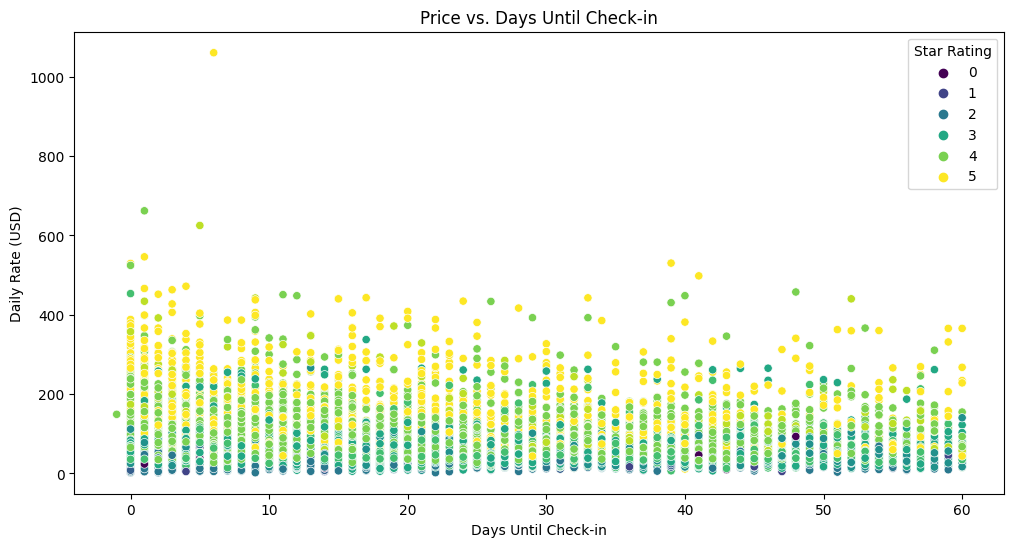

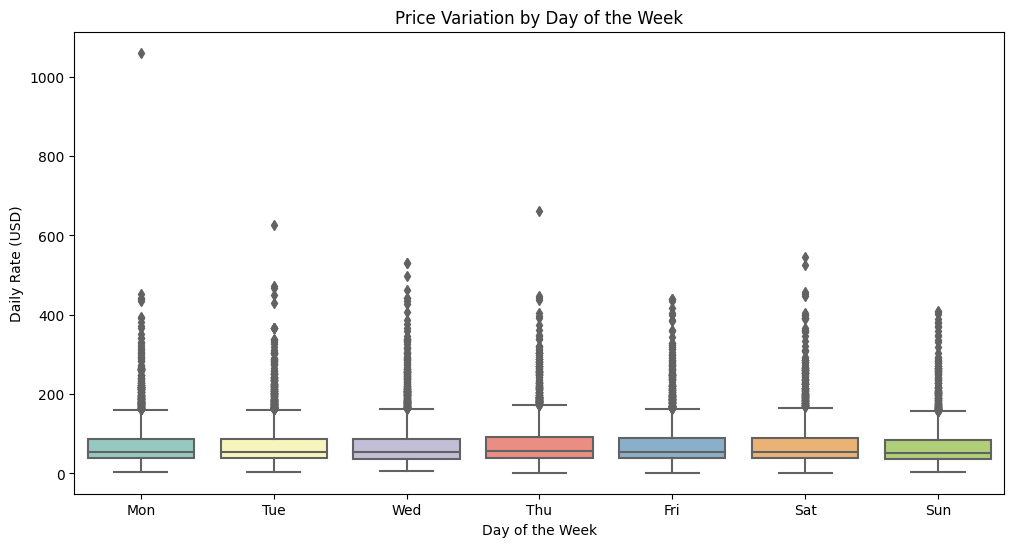

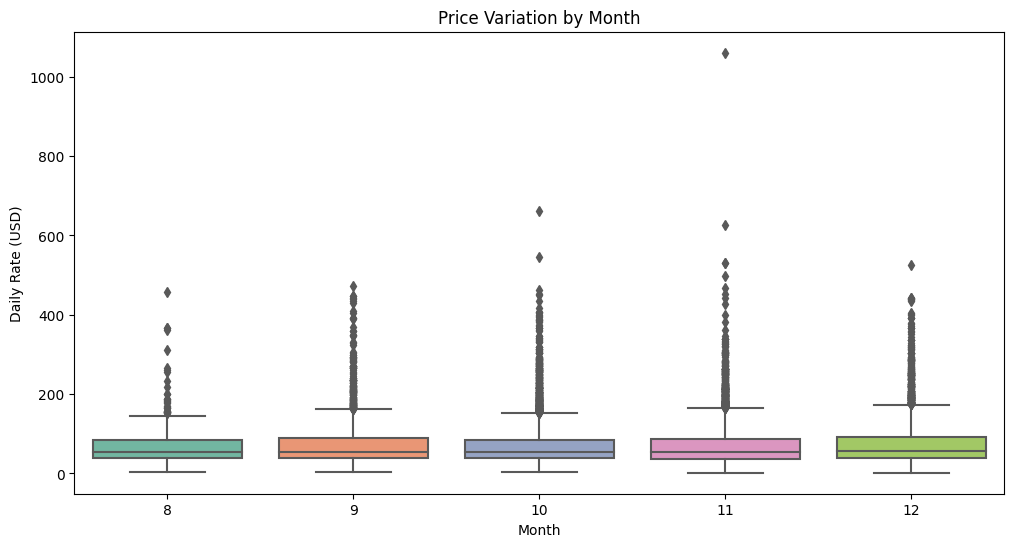

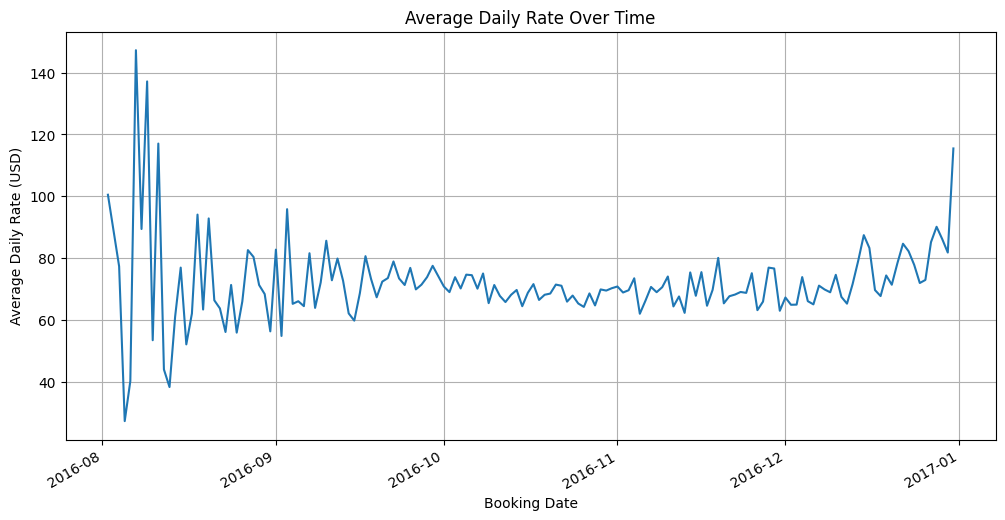

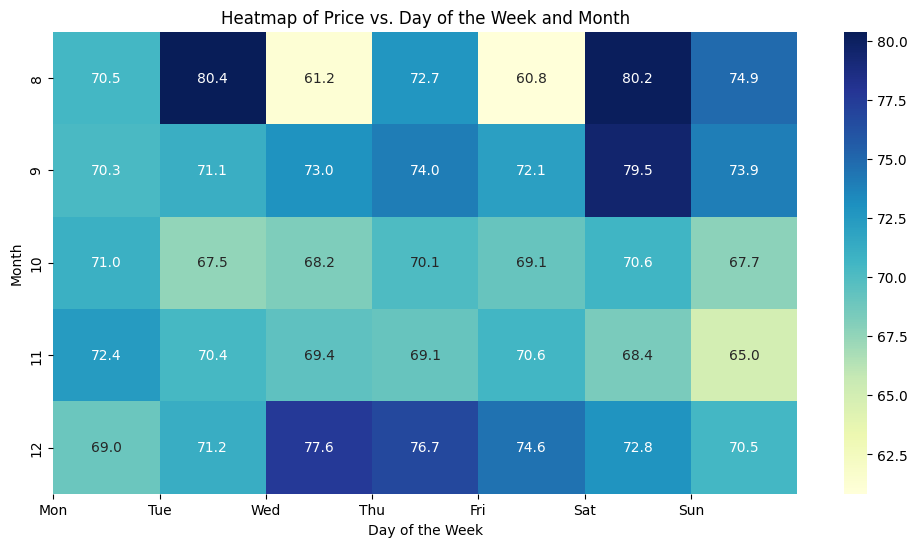

<ipython-input-29-93f3e274c09b>:53: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='star_rating', y='daily_rate', data=df, ci=None, palette='pastel')


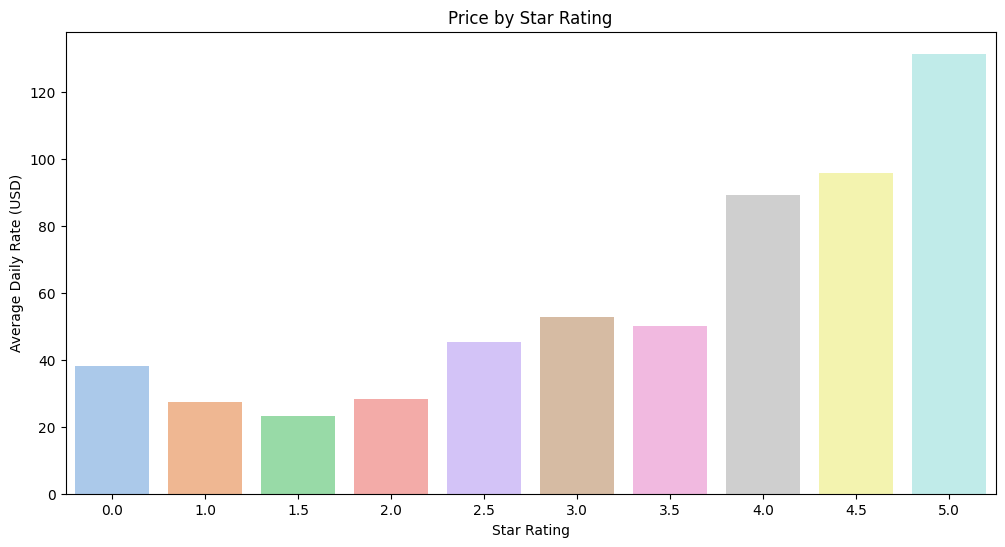

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Visualization 1: Scatter Plot for Price vs. Days Until Check-in
plt.figure(figsize=(12, 6))
sns.scatterplot(x='days_until_checkin', y='daily_rate', data=df, hue='star_rating', palette='viridis')
plt.title('Price vs. Days Until Check-in')
plt.xlabel('Days Until Check-in')
plt.ylabel('Daily Rate (USD)')
plt.legend(title='Star Rating')
plt.show()

# Visualization 2: Box Plots by Day of the Week
plt.figure(figsize=(12, 6))
sns.boxplot(x='booking_day_of_week', y='daily_rate', data=df, palette='Set3')
plt.title('Price Variation by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Daily Rate (USD)')
plt.xticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()

# Visualization 3: Box Plots by Month
plt.figure(figsize=(12, 6))
sns.boxplot(x='booking_month', y='daily_rate', data=df, palette='Set2')
plt.title('Price Variation by Month')
plt.xlabel('Month')
plt.ylabel('Daily Rate (USD)')
plt.show()

# Visualization 4: Time Series Plot for Seasonality
plt.figure(figsize=(12, 6))
df.groupby('booking_date')['daily_rate'].mean().plot()
plt.title('Average Daily Rate Over Time')
plt.xlabel('Booking Date')
plt.ylabel('Average Daily Rate (USD)')
plt.grid(True)
plt.show()

# Visualization 5: Heatmap of Price vs. Day of the Week and Month
pivot_table = df.pivot_table(values='daily_rate', index='booking_month', columns='booking_day_of_week', aggfunc='mean')
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt=".1f")
plt.title('Heatmap of Price vs. Day of the Week and Month')
plt.xlabel('Day of the Week')
plt.ylabel('Month')
plt.xticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()

# Visualization 6: Grouped Bar Chart for Price by Star Rating
plt.figure(figsize=(12, 6))
sns.barplot(x='star_rating', y='daily_rate', data=df, ci=None, palette='pastel')
plt.title('Price by Star Rating')
plt.xlabel('Star Rating')
plt.ylabel('Average Daily Rate (USD)')
plt.show()
